<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузим-нужные-библиотеки" data-toc-modified-id="Загрузим-нужные-библиотеки-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузим нужные библиотеки</a></span></li><li><span><a href="#Рассмотрим-датасет-по-ближе" data-toc-modified-id="Рассмотрим-датасет-по-ближе-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Рассмотрим датасет по ближе</a></span></li><li><span><a href="#Добавим-новых-признаков" data-toc-modified-id="Добавим-новых-признаков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавим новых признаков</a></span></li><li><span><a href="#Помотрим-на-распределение-данных" data-toc-modified-id="Помотрим-на-распределение-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Помотрим на распределение данных</a></span></li><li><span><a href="#Выделим-выборки" data-toc-modified-id="Выделим-выборки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выделим выборки</a></span></li><li><span><a href="#тестовая-выборка" data-toc-modified-id="тестовая-выборка-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>тестовая выборка</a></span></li><li><span><a href="#Выбор-модели" data-toc-modified-id="Выбор-модели-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выбор модели</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Подготовка-результатов" data-toc-modified-id="Подготовка-результатов-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Подготовка результатов</a></span></li></ul></div>

## Загрузим нужные библиотеки

In [1]:
!pip install catboost

In [2]:
!pip install pymystem3

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import time
import nltk

from catboost import CatBoostClassifier


from sklearn.metrics import make_scorer

from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from pymystem3 import Mystem
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
df_train = pd.read_csv("train_dataset_train.csv")

In [5]:
df_test = pd.read_csv("test_dataset_test.csv")

## Рассмотрим датасет по ближе

In [6]:
df_train.head()

,RecordNo,Название книги,Автор,Ссылка на литрес,Рейтинг,Количество оценок,Количество отзывов,Имя читателя,Оценка книги читателем (из 5 баллов),Отзыв,Лайки на отзыв,Дислайки на отзыв,Релевантность,Таксономия релевантные,Таксономия не релевантные,Длина отзыва,Ценности
0,6145,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.7,3922,408,Айгуль Ляпина,5.0,Рекомендую книгу в прочтению/прослушиванию. Ес...,0,3,0,0,0,0,0
1,7006,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,Olga T,5.0,"Удивительно, что сейчас возникает ТАКАЯ литера...",0,1,0,0,0,0,1
2,1124,Дети мои,Гузель Яхина,https://www.litres.ru/guzel-yahina/deti-moi/,4.4,8032,702,Кирилл Чириков,5.0,"Душевно, жизненно, чувственно, проникновенно!!...",0,0,0,1,0,0,1
3,4716,ПОСТ,Дмитрий Глуховский,https://www.litres.ru/dmitriy-gluhovskiy/post/,3.9,430,48,Kimetov Oleg,5.0,Очень понравилось. Причем понравилось больше «...,2,7,0,1,0,0,0
4,2946,ПОСТ,Дмитрий Глуховский,https://www.litres.ru/dmitriy-gluhovskiy/post-...,4.4,832,113,Сергей Никитин,5.0,Круто. Автор и он же чтец – гений. Прослушал н...,1,0,0,0,0,0,0


In [7]:
df_train.shape

(4839, 17)

In [8]:
df_train.nunique()

RecordNo                                4839
Название книги                           103
Автор                                     59
Ссылка на литрес                         144
Рейтинг                                   18
Количество оценок                        106
Количество отзывов                        57
Имя читателя                            4263
Оценка книги читателем (из 5 баллов)       5
Отзыв                                   4826
Лайки на отзыв                            98
Дислайки на отзыв                         47
Релевантность                              2
Таксономия релевантные                     2
Таксономия не релевантные                  2
Длина отзыва                               2
Ценности                                   2
dtype: int64

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RecordNo                              4839 non-null   int64  
 1   Название книги                        4839 non-null   object 
 2   Автор                                 4839 non-null   object 
 3   Ссылка на литрес                      4839 non-null   object 
 4   Рейтинг                               4839 non-null   float64
 5   Количество оценок                     4839 non-null   int64  
 6   Количество отзывов                    4839 non-null   int64  
 7   Имя читателя                          4839 non-null   object 
 8   Оценка книги читателем (из 5 баллов)  4070 non-null   float64
 9   Отзыв                                 4839 non-null   object 
 10  Лайки на отзыв                        4839 non-null   int64  
 11  Дислайки на отзыв

## Добавим новых признаков

In [10]:
def lemmatize(df):
    comments_new = []
    m = Mystem()
    for comment in df:
        clear_text = re.sub(r'[^а-яА-ЯёЁ0-9]',' ', comment)
        clear_text = ' '.join(m.lemmatize(clear_text))
        comments_new.append(clear_text)
    return comments_new

In [11]:
def num_words(df):
    num_words = []
    for i in range(0,df.shape[0]):
        num_words.append(len(str.split(df_train['clear_text'].values[i])))
    return num_words     

In [12]:
def add_features(df_train,):
    df_train['len_reviews'] = df_train['Отзыв'].map(len)
    df_train['Автор'] =      pd.Categorical(df_train['Автор'])
    df_train['Автор'].astype('category').cat.codes
    df_train['Автор'] = df_train['Автор'].cat.codes
    df_train = df_train.fillna(0)
    return df_train

In [13]:
df_train['clear_text'] = lemmatize(df_train['Отзыв'])

In [14]:
df_train['num_words'] = num_words(df_train['clear_text'])

In [15]:
df_train = add_features(df_train)

In [16]:
df_train.head()

,RecordNo,Название книги,Автор,Ссылка на литрес,Рейтинг,Количество оценок,Количество отзывов,Имя читателя,Оценка книги читателем (из 5 баллов),Отзыв,Лайки на отзыв,Дислайки на отзыв,Релевантность,Таксономия релевантные,Таксономия не релевантные,Длина отзыва,Ценности,clear_text,num_words,len_reviews
0,6145,Зулейха открывает глаза,23,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.7,3922,408,Айгуль Ляпина,5.0,Рекомендую книгу в прочтению/прослушиванию. Ес...,0,3,0,0,0,0,0,рекомендовать книга в прочтение прослу...,24,157
1,7006,Зулейха открывает глаза,23,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,Olga T,5.0,"Удивительно, что сейчас возникает ТАКАЯ литера...",0,1,0,0,0,0,1,удивительно что сейчас возникать тако...,40,283
2,1124,Дети мои,23,https://www.litres.ru/guzel-yahina/deti-moi/,4.4,8032,702,Кирилл Чириков,5.0,"Душевно, жизненно, чувственно, проникновенно!!...",0,0,0,1,0,0,1,душевно жизненно чувственно проникнов...,35,278
3,4716,ПОСТ,27,https://www.litres.ru/dmitriy-gluhovskiy/post/,3.9,430,48,Kimetov Oleg,5.0,Очень понравилось. Причем понравилось больше «...,2,7,0,1,0,0,0,очень понравиться причем понравиться ...,52,342
4,2946,ПОСТ,27,https://www.litres.ru/dmitriy-gluhovskiy/post-...,4.4,832,113,Сергей Никитин,5.0,Круто. Автор и он же чтец – гений. Прослушал н...,1,0,0,0,0,0,0,круто автор и он же чтец гений ...,27,177


## Помотрим на распределение данных

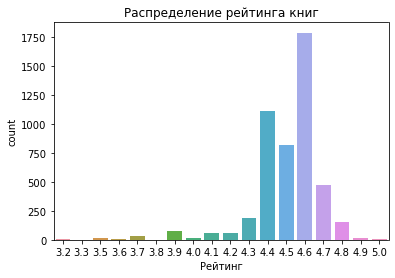

In [17]:
_ = sns.countplot(x = "Рейтинг" , data  = df_train).set_title('Распределение рейтинга книг')

Взглянем на несколько величин сразу

In [18]:
df_train.columns.values

array(['RecordNo', 'Название книги', 'Автор', 'Ссылка на литрес',
       'Рейтинг', 'Количество оценок', 'Количество отзывов',
       'Имя читателя', 'Оценка книги читателем (из 5 баллов)', 'Отзыв',
       'Лайки на отзыв', 'Дислайки на отзыв', 'Релевантность',
       'Таксономия релевантные', 'Таксономия не релевантные',
       'Длина отзыва', 'Ценности', 'clear_text', 'num_words',
       'len_reviews'], dtype=object)

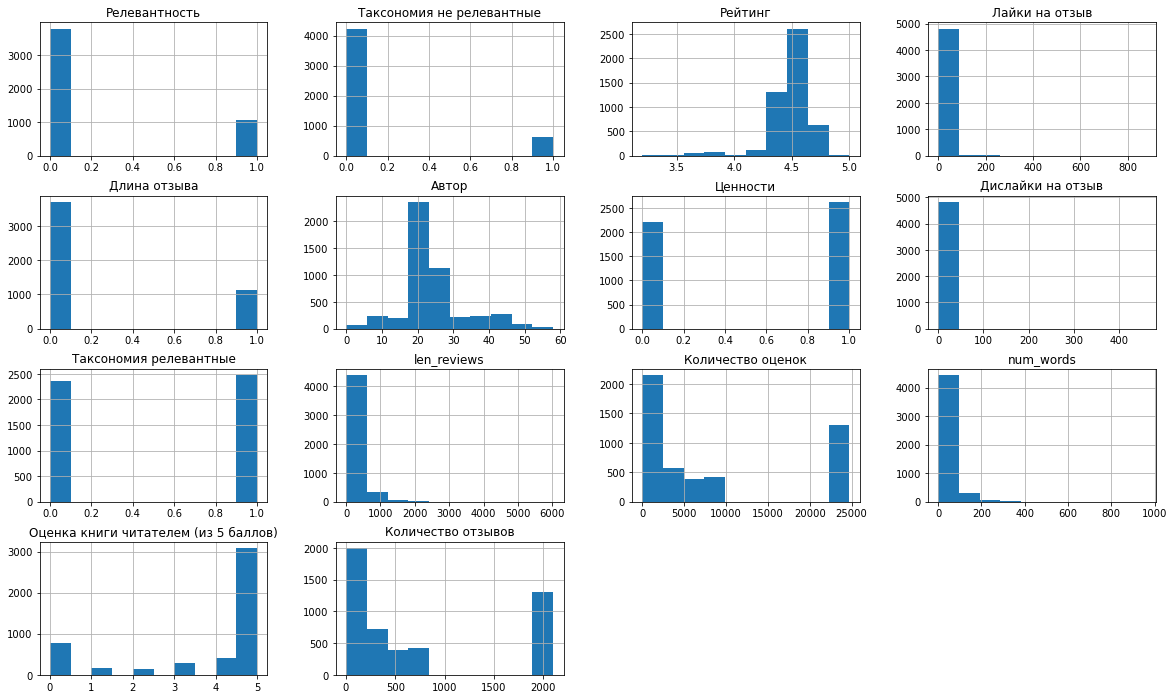

In [19]:
features = list(set(df_train.columns.values) - set(['RecordNo']))

_ = df_train[features].hist(figsize=(20,12))

In [20]:
df_train["Дислайки на отзыв"].value_counts()

0      2304
1      1487
2       320
3       275
4       147
5        79
6        51
7        31
8        28
10       14
13       12
9        11
11        9
12        8
16        7
19        5
14        4
35        4
17        4
15        4
28        3
21        2
18        2
32        2
108       2
22        2
24        2
29        1
117       1
235       1
181       1
459       1
56        1
69        1
37        1
256       1
147       1
317       1
57        1
66        1
91        1
53        1
33        1
20        1
41        1
40        1
23        1
Name: Дислайки на отзыв, dtype: int64

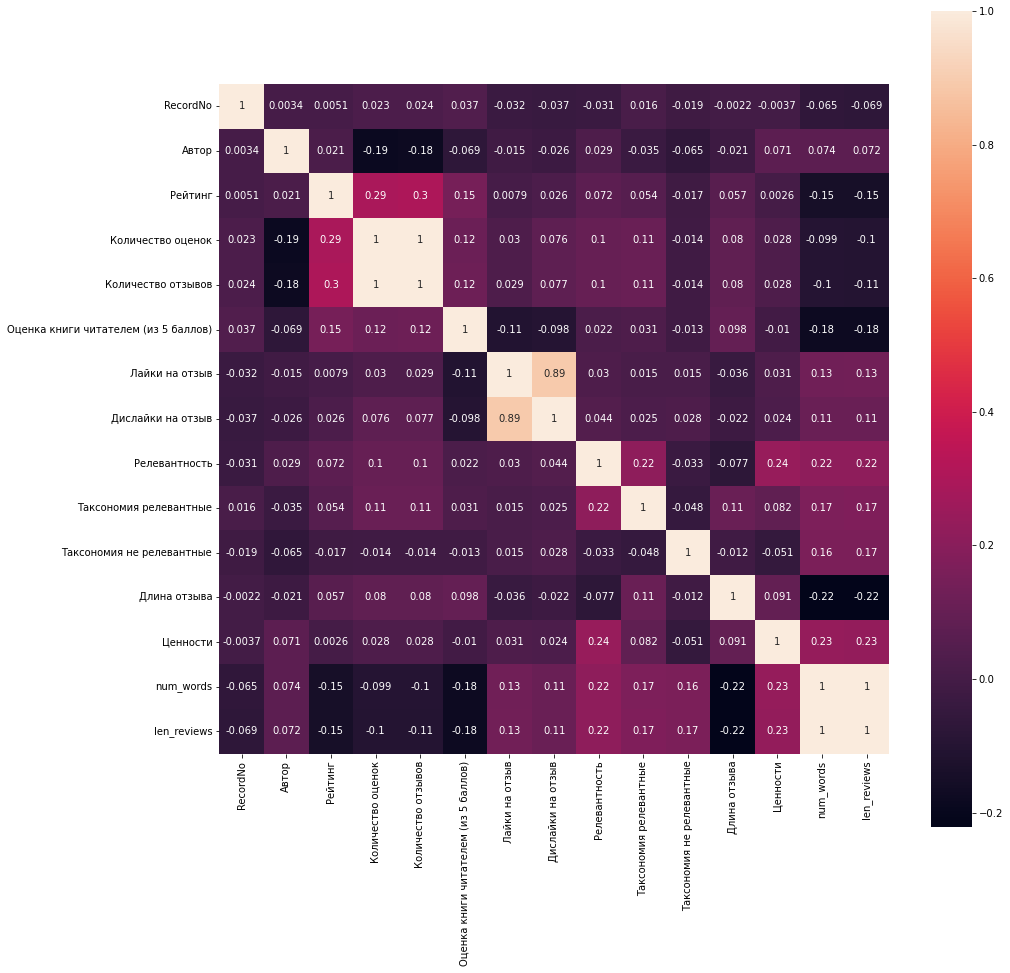

In [21]:
plt.rcParams['figure.figsize']=(15,15)

g = sns.heatmap(df_train.corr(), square = True, annot=True)

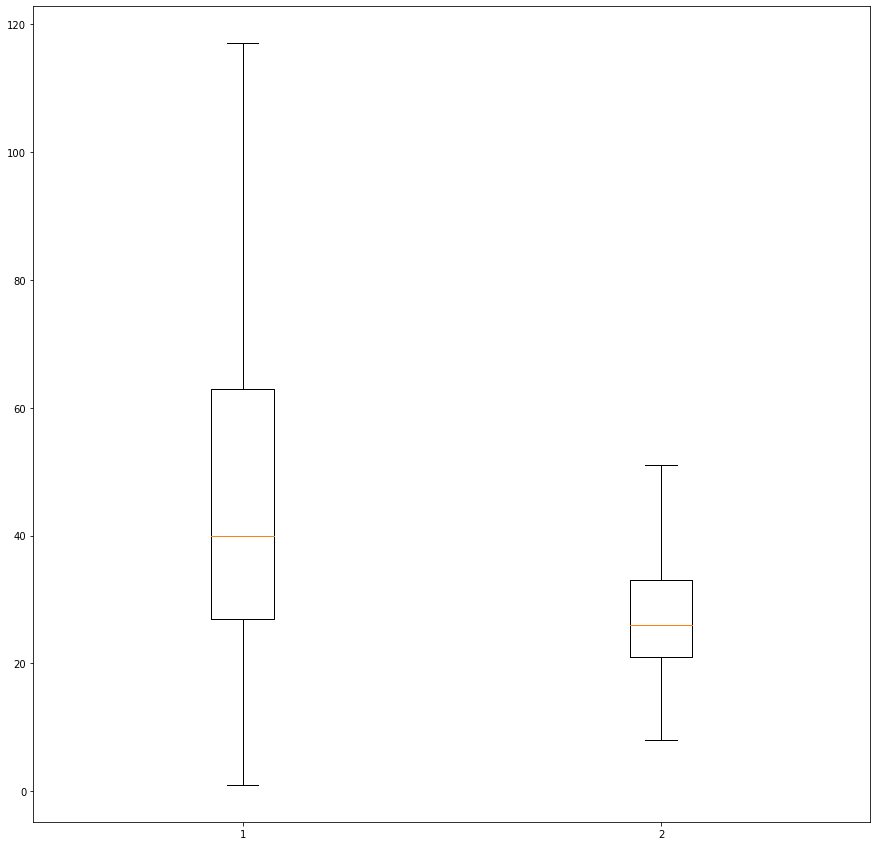

In [22]:
plt.boxplot([df_train[df_train['Длина отзыва'] == 0]['num_words'],\
          df_train[df_train['Длина отзыва'] == 1]['num_words']], showfliers=False);

In [23]:
df_train[df_train['Длина отзыва'] == 0]['num_words'].median()

40.0

In [24]:
df_train[df_train['Длина отзыва'] == 1]['num_words'].median()

26.0

## Выделим выборки

In [25]:
mass_label = ['Релевантность',
       'Таксономия релевантные', 'Таксономия не релевантные',
       'Длина отзыва', 'Ценности']

In [26]:
object_label = df_train.dtypes[df_train.dtypes == "object"].index.values
object_label = np.append(object_label,"RecordNo")
object_label

array(['Название книги', 'Ссылка на литрес', 'Имя читателя', 'Отзыв',
       'clear_text', 'RecordNo'], dtype=object)

In [27]:
X_train = df_train.drop(mass_label, axis = 1)
X_train = X_train.drop(object_label, axis = 1)

y_train_1 = df_train['Релевантность']
y_train_2 = df_train['Таксономия релевантные']
y_train_3 = df_train['Таксономия не релевантные']
y_train_4 = df_train['Длина отзыва']
y_train_5 = df_train['Ценности']

In [28]:
y_train_1.shape

(4839,)

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Автор                                 4839 non-null   int8   
 1   Рейтинг                               4839 non-null   float64
 2   Количество оценок                     4839 non-null   int64  
 3   Количество отзывов                    4839 non-null   int64  
 4   Оценка книги читателем (из 5 баллов)  4839 non-null   float64
 5   Лайки на отзыв                        4839 non-null   int64  
 6   Дислайки на отзыв                     4839 non-null   int64  
 7   num_words                             4839 non-null   int64  
 8   len_reviews                           4839 non-null   int64  
dtypes: float64(2), int64(6), int8(1)
memory usage: 307.3 KB


## тестовая выборка

In [30]:
df_test['clear_text'] = lemmatize(df_test['Отзыв'])

In [31]:
df_test['num_words'] = num_words(df_test['clear_text'])

In [32]:
X_test = add_features(df_test)

In [33]:
X_test.head()

,RecordNo,Название книги,Автор,Ссылка на литрес,Рейтинг,Количество оценок,Количество отзывов,Имя читателя,Оценка книги читателем (из 5 баллов),Отзыв,Лайки на отзыв,Дислайки на отзыв,clear_text,num_words,len_reviews
0,3366,Дети мои,19,https://www.litres.ru/guzel-yahina/deti-moi/,4.4,8032,702,Марина Ефимкина,5.0,"Настоящая глубокая книга, коих сейчас очень не...",2,0,настоящий глубокий книга кой сейчас ...,24,181
1,3952,Текст,23,https://www.litres.ru/dmitriy-gluhovskiy/tekst...,4.5,1923,246,alexvarp,5.0,Одна из лучших книг прочитанных за последние г...,1,0,один из хороший книга прочитывать за...,40,219
2,6852,Текст,23,https://www.litres.ru/dmitriy-gluhovskiy/tekst/,4.4,7276,622,fb_154207611938008,5.0,"Тот случай, когда невозможно пройти мимо, не о...",0,0,тот случай когда невозможно проходить...,35,390
3,4586,Зулейха открывает глаза,19,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,Мария Курочкина,0.0,"Очень не глубокая книга. Дочитала до конца, в ...",4,0,очень не глубокий книга дочитывать ...,52,280
4,4677,Зулейха открывает глаза,19,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,sahnovavera,0.0,"Очень понравилась. Читается легко, о непростых...",0,1,очень понравиться читаться легко о ...,27,136


In [34]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('russian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/grigoriidubovoi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
count_tf_idf = TfidfVectorizer(stop_words=stopwords)
tf_idf_train = count_tf_idf.fit_transform(df_train['clear_text']) 
tf_idf_test = count_tf_idf.transform(df_test['clear_text'])

In [37]:
recall = make_scorer(recall_score , average='macro')

In [38]:
count_vect_unigram = CountVectorizer(stop_words=stopwords,ngram_range=(1,1)) 
bow_train_unigram = count_vect_unigram.fit_transform(df_train['clear_text']) 
bow_test_unigram = count_vect_unigram.transform(df_test['clear_text'])

In [94]:
count_vect_bigram = CountVectorizer(stop_words=stopwords,ngram_range=(1,2)) 
bow_train_bigram = count_vect_bigram.fit_transform(df_train['clear_text']) 
bow_test_bigram = count_vect_bigram.transform(df_test['clear_text'])

## Выбор модели

In [39]:
def change_model(df_train,y,tf_idf_train,bow_train_unigram):
    recall = make_scorer(recall_score , average='macro')
    X_train = df_train[['Автор','Рейтинг','Количество оценок','Количество отзывов',\
                        'Оценка книги читателем (из 5 баллов)','Лайки на отзыв',\
                       'Дислайки на отзыв','len_reviews','num_words']]
    model=CatBoostClassifier(verbose=False)
    res_table = cross_val_score(model, X_train, y, scoring=recall, cv=3)
    print('На табличных данных', res_table)
    res = cross_val_score(model, tf_idf_train, y, scoring=recall, cv=3)
    print('TFIDF', res)
    res_bow_uni = cross_val_score(model, bow_train_unigram, y, scoring=recall, cv=3)
    print('Униграммы',res_bow_uni)
    #res_bow_bi = cross_val_score(model, bow_train_bigram, y, scoring=recall, cv=3)
    #print('Биграммы',res_bow_bi)

In [40]:
%%time
change_model(df_train,df_train['Релевантность'],tf_idf_train,bow_train_unigram)

На табличных данных [0.56582866 0.56491861 0.57585323]
TFIDF [0.60371909 0.60225842 0.60174581]
Униграммы [0.61594108 0.6065628  0.62146005]
CPU times: user 11min 15s, sys: 7.63 s, total: 11min 23s
Wall time: 3min 59s


In [41]:
%%time
change_model(df_train,df_train['Таксономия релевантные'],tf_idf_train,bow_train_unigram)

На табличных данных [0.61265772 0.61657888 0.58629631]
TFIDF [0.98483683 0.99210075 0.98962727]
Униграммы [0.99149543 0.99391673 0.99506863]
CPU times: user 11min 15s, sys: 7.35 s, total: 11min 23s
Wall time: 3min 56s


In [42]:
%%time
change_model(df_train,df_train['Таксономия не релевантные'],tf_idf_train,bow_train_unigram)

На табличных данных [0.5272826  0.52851129 0.53653859]
TFIDF [0.96323529 0.97733855 0.96270441]
Униграммы [0.98248828 0.97489953 0.97454442]
CPU times: user 11min 19s, sys: 7.8 s, total: 11min 27s
Wall time: 4min 1s


In [43]:
%%time
change_model(df_train,df_train['Длина отзыва'],tf_idf_train,bow_train_unigram)

На табличных данных [0.52926761 0.53384001 0.53972003]
TFIDF [0.56346743 0.55505189 0.55727561]
Униграммы [0.5367682  0.52244668 0.52528299]
CPU times: user 11min 18s, sys: 8.3 s, total: 11min 26s
Wall time: 4min 3s


In [44]:
%%time
change_model(df_train,df_train['Ценности'],tf_idf_train,bow_train_unigram)

На табличных данных [0.62398473 0.59480311 0.60961363]
TFIDF [0.97076884 0.96239661 0.97511034]
Униграммы [0.97727076 0.97076884 0.98025319]
CPU times: user 11min 25s, sys: 10.3 s, total: 11min 35s
Wall time: 4min 7s


## Обучение модели

In [45]:
model1=CatBoostClassifier(verbose=False)
model2=CatBoostClassifier(verbose=False)
model3=CatBoostClassifier(verbose=False)
model4=CatBoostClassifier(verbose=False)
model5=CatBoostClassifier(verbose=False)

In [46]:
model1.fit(bow_train_unigram,df_train['Релевантность'])

In [47]:
model2.fit(bow_train_unigram,df_train['Таксономия релевантные'])

In [48]:
model3.fit(bow_train_unigram,df_train['Таксономия не релевантные'])

In [49]:
model4.fit(tf_idf_train,df_train['Длина отзыва'])

In [50]:
model5.fit(bow_train_unigram,df_train['Ценности'])

In [51]:
y1 = model1.predict(bow_test_unigram)

In [52]:
y2 = model2.predict(bow_test_unigram)

In [53]:
y3 = model3.predict(bow_test_unigram)

In [54]:
y4 = model4.predict(tf_idf_test)

In [55]:
y5 = model5.predict(bow_test_unigram)

## Подготовка результатов

In [95]:
df = pd.DataFrame([y1,y2,y3,y4,y5] ,index=['Релевантность', 'Таксономия релевантные',
       'Таксономия не релевантные', 'Длина отзыва', 'Ценности'])
df = df.transpose()

In [99]:
df.head(5)

,Релевантность,Таксономия релевантные,Таксономия не релевантные,Длина отзыва,Ценности
0,0,0,0,1,1
1,0,1,0,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,1,0,0,0


In [104]:
df_solution = pd.read_csv('sample_solution.csv')

In [105]:
df_solution[['Релевантность', 'Таксономия релевантные',
       'Таксономия не релевантные', 'Длина отзыва', 'Ценности']] = df

In [103]:
df_solution.head()

,RecordNo,Релевантность,Таксономия релевантные,Таксономия не релевантные,Длина отзыва,Ценности
0,3366,0,0,0,1,1
1,3952,0,1,0,0,0
2,6852,0,0,0,0,1
3,4586,0,0,0,0,1
4,4677,0,1,0,0,0


In [106]:
df_solution.to_csv('vologda_04_10_solution.csv', index=False)